<a href="https://colab.research.google.com/github/secretlyUnhinged/NativeSoftTech/blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm
nltk.download("stopwords", quiet=True)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)

True

In [ ]:

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Sample a reduced subset for faster processing
df_reduced = df.sample(n=10000, random_state=42)
print(f"Reduced dataset size: {len(df_reduced)} samples")

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to 'review' column
df_reduced["cleaned_review"] = df_reduced["review"].apply(clean_text)



Reduced dataset size: 10000 samples


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenization
df_reduced["tokens"] = df_reduced["cleaned_review"].apply(word_tokenize)

# Remove stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_reduced["tokens_no_stopwords"] = df_reduced["tokens"].apply(remove_stopwords)



In [ ]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

# Function to convert POS tags to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Lemmatization with POS tagging
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

# Apply it
df_reduced["lemmatized"] = df_reduced["tokens"].apply(lemmatize_tokens)


In [ ]:
print(df_reduced[["tokens_no_stopwords", "lemmatized"]].head())


                                     tokens_no_stopwords  \
33553  [really, liked, summerslam, due, look, arena, ...   
9427   [many, television, shows, appeal, quite, many,...   
199    [film, quickly, gets, major, chase, scene, eve...   
12447  [jane, austen, would, definitely, approve, one...   
39489  [expectations, somewhat, high, went, see, movi...   

                                              lemmatized  
33553  [i, really, like, this, summerslam, due, to, t...  
9427   [not, many, television, show, appeal, to, quit...  
199    [the, film, quickly, get, to, a, major, chase,...  
12447  [jane, austen, would, definitely, approve, of,...  
39489  [expectation, be, somewhat, high, for, me, whe...  


In [ ]:
df_reduced.to_csv("processed_imdb_sample.csv", index=False)
print("Processing complete. Reduced dataset saved to 'processed_imdb_sample.csv'")

Processing complete. Reduced dataset saved to 'processed_imdb_sample.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
# Load preprocessed dataset
df = pd.read_csv("processed_imdb_sample.csv")

# Prepare data for feature extraction
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: ' '.join(eval(x) if isinstance(x, str) else x))
X = df['lemmatized_text']
y = df['sentiment'] if 'sentiment' in df.columns else None

# Split data into training and testing sets
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")







Training set size: 8000
Testing set size: 2000


In [ ]:
# 1. Bag of Words Feature Extraction
print("\n--- Bag of Words Feature Extraction ---")
count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)
print(f"BoW training set shape: {X_train_bow.shape}")
print(f"BoW testing set shape: {X_test_bow.shape}")
bow_vocab = count_vectorizer.get_feature_names_out()
print(f"BoW vocabulary size: {len(bow_vocab)}")
print(f"Sample BoW features: {bow_vocab[:10]}")


--- Bag of Words Feature Extraction ---
BoW training set shape: (8000, 5000)
BoW testing set shape: (2000, 5000)
BoW vocabulary size: 5000
Sample BoW features: ['aaron' 'abandon' 'abbott' 'ability' 'able' 'abortion' 'about' 'aboutbr'
 'above' 'abraham']


In [ ]:

# 2. TF-IDF Feature Extraction
print("\n--- TF-IDF Feature Extraction ---")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(f"TF-IDF training set shape: {X_train_tfidf.shape}")
print(f"TF-IDF testing set shape: {X_test_tfidf.shape}")
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
print(f"TF-IDF vocabulary size: {len(tfidf_vocab)}")
print(f"Sample TF-IDF features: {tfidf_vocab[:10]}")



--- TF-IDF Feature Extraction ---
TF-IDF training set shape: (8000, 5000)
TF-IDF testing set shape: (2000, 5000)
TF-IDF vocabulary size: 5000
Sample TF-IDF features: ['aaron' 'abandon' 'abbott' 'ability' 'able' 'abortion' 'about' 'aboutbr'
 'above' 'abraham']


In [ ]:
# 3. Compare the two methods
print("\n--- Comparing BoW and TF-IDF for a sample document ---")
sample_idx = 0
sample_doc = X_train.iloc[sample_idx]
print(f"Sample document: {sample_doc[:100]}...")
# Function to get top words from vector
def get_top_words(vector, feature_names, n=10):
    indices = np.argsort(vector)[-n:][::-1]
    return [(feature_names[i], vector[i]) for i in indices]

print("\nTop 10 words by BoW count:")
for word, count in get_top_words(X_train_bow[sample_idx].toarray()[0], bow_vocab):
    print(f"{word}: {count}")

print("\nTop 10 words by TF-IDF score:")
for word, score in get_top_words(X_train_tfidf[sample_idx].toarray()[0], tfidf_vocab):
    print(f"{word}: {score:.4f}")



--- Comparing BoW and TF-IDF for a sample document ---
Sample document: i saw it tonight and fell asleep in the moviebr br that be something that i have not do since i have...

Top 10 words by BoW count:
this: 7
br: 6
and: 6
be: 6
the: 6
have: 5
not: 5
do: 5
that: 5
in: 4

Top 10 words by TF-IDF score:
asleep: 0.2829
br: 0.2243
moviebr: 0.2187
city: 0.2072
sex: 0.2015
do: 0.2012
this: 0.1877
not: 0.1844
bette: 0.1656
tonight: 0.1628



--- Visualizing Feature Distributions ---
BoW sparsity: 0.9774 (percentage of zero values)
TF-IDF sparsity: 0.9774 (percentage of zero values)
Feature distributions saved as 'feature_distributions.png'


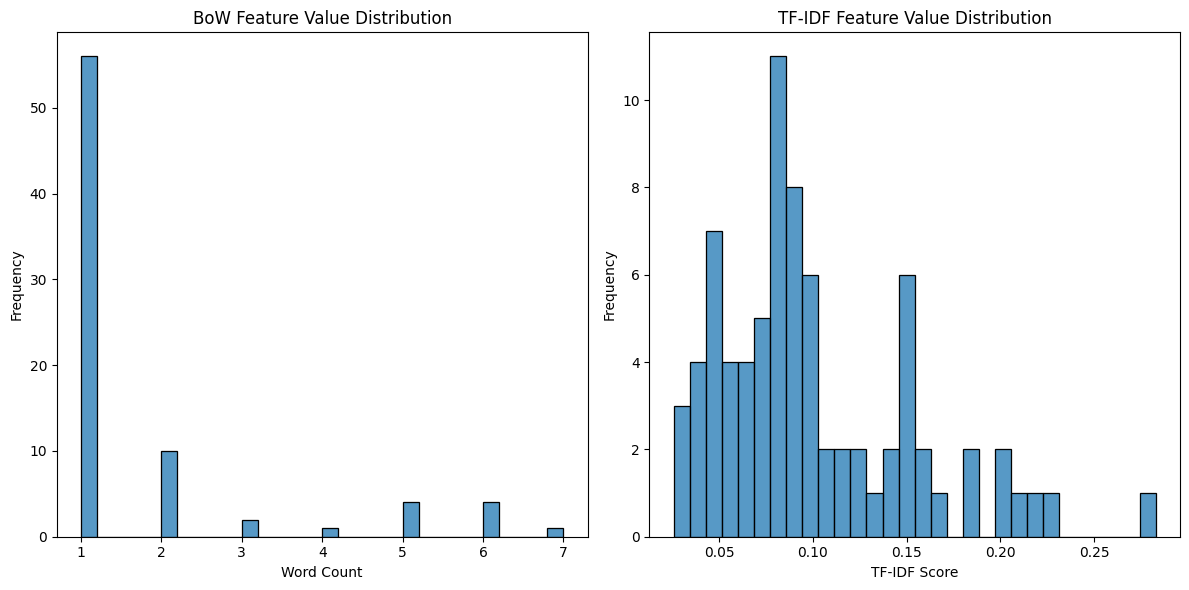

In [ ]:
# 4. Visualize the feature distributions
print("\n--- Visualizing Feature Distributions ---")
bow_sparsity = 1.0 - (np.count_nonzero(X_train_bow.toarray()) / X_train_bow.toarray().size)
tfidf_sparsity = 1.0 - (np.count_nonzero(X_train_tfidf.toarray()) / X_train_tfidf.toarray().size)
print(f"BoW sparsity: {bow_sparsity:.4f} (percentage of zero values)")
print(f"TF-IDF sparsity: {tfidf_sparsity:.4f} (percentage of zero values)")

plt.figure(figsize=(12, 6))
# Plot BoW distribution
plt.subplot(1, 2, 1)
sns.histplot(X_train_bow[sample_idx].toarray()[0][X_train_bow[sample_idx].toarray()[0] > 0], bins=30)
plt.title("BoW Feature Value Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Plot TF-IDF distribution
plt.subplot(1, 2, 2)
sns.histplot(X_train_tfidf[sample_idx].toarray()[0][X_train_tfidf[sample_idx].toarray()[0] > 0], bins=30)
plt.title("TF-IDF Feature Value Distribution")
plt.xlabel("TF-IDF Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("feature_distributions.png")
print("Feature distributions saved as 'feature_distributions.png'")


In [ ]:
import numpy as np
# 5. Save the extracted features for later use
np.save("X_train_bow.npy", X_train_bow.toarray())
np.save("X_test_bow.npy", X_test_bow.toarray())
np.save("X_train_tfidf.npy", X_train_tfidf.toarray())
np.save("X_test_tfidf.npy", X_test_tfidf.toarray())

if y is not None:
    np.save("y_train.npy", y_train.values)
    np.save("y_test.npy", y_test.values)

print("\nExtracted features saved as .npy files")
print("Feature extraction complete!")


Extracted features saved as .npy files
Feature extraction complete!


In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt








In [ ]:
# Load extracted features
X_train_bow = np.load("X_train_bow.npy")
X_test_bow = np.load("X_test_bow.npy")
X_train_tfidf = np.load("X_train_tfidf.npy")
X_test_tfidf = np.load("X_test_tfidf.npy")
y_train = np.load("y_train.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


In [ ]:
# Initialize classifiers
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train)

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred_nb_bow = nb_bow.predict(X_test_bow)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)


Naïve Bayes (BoW) Performance:
Accuracy: 0.8275
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83       999
    positive       0.85      0.80      0.82      1001

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000


Naïve Bayes (TF-IDF) Performance:
Accuracy: 0.8480
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85       999
    positive       0.85      0.84      0.85      1001

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


Logistic Regression (BoW) Performance:
Accuracy: 0.8515
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85       999
    positive       0.84      0.87      0.85      1001

    accuracy            

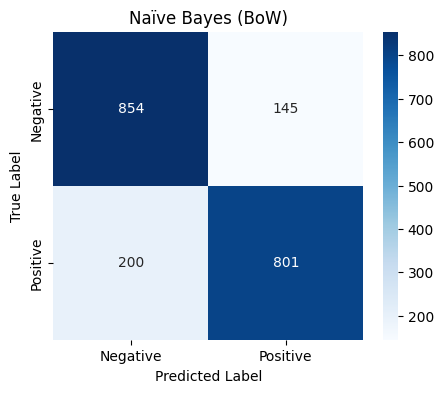

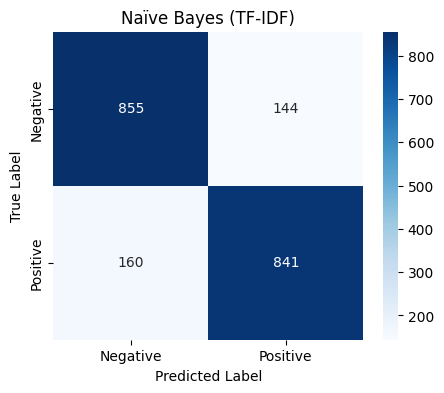

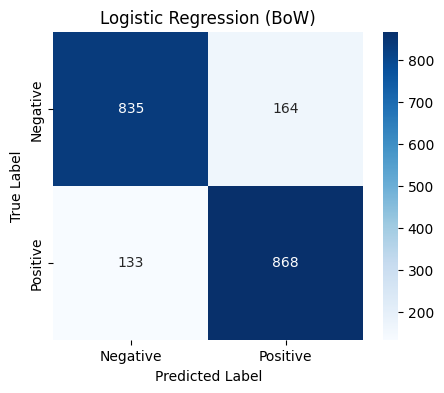

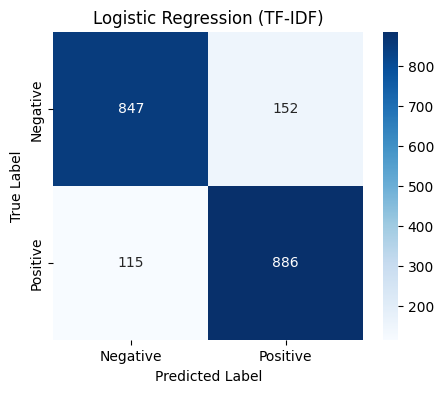

In [ ]:
# Function to evaluate model performance
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate models
evaluate_model("Naïve Bayes (BoW)", y_test, y_pred_nb_bow)
evaluate_model("Naïve Bayes (TF-IDF)", y_test, y_pred_nb_tfidf)
evaluate_model("Logistic Regression (BoW)", y_test, y_pred_lr_bow)
evaluate_model("Logistic Regression (TF-IDF)", y_test, y_pred_lr_tfidf)
def plot_confusion_matrix(y_true, y_pred, title):
 cm = confusion_matrix(y_true, y_pred)
 plt.figure(figsize=(5, 4))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
 plt.xlabel("Predicted Label")
 plt.ylabel("True Label")
 plt.title(title)
 plt.show()
plot_confusion_matrix(y_test, y_pred_nb_bow, "Naïve Bayes (BoW)")
plot_confusion_matrix(y_test, y_pred_nb_tfidf, "Naïve Bayes (TF-IDF)")
plot_confusion_matrix(y_test, y_pred_lr_bow, "Logistic Regression (BoW)")
plot_confusion_matrix(y_test, y_pred_lr_tfidf, "Logistic Regression (TF-IDF)")